In [34]:
from sklearn.datasets import load_breast_cancer 
bc = load_breast_cancer()

In [35]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Preprocess

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size = 0.2)

In [37]:
print(f"X_train = {X_train.shape} and X_test = {X_test.shape} \n y_train = {y_train.shape} and y_test = {y_test.shape}")

X_train = (455, 30) and X_test = (114, 30) 
 y_train = (455,) and y_test = (114,)


## normalize

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification

In [39]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
 acc_train = accuracy_score(y_true= y_train, y_pred= y_pred_train)
 acc_test = accuracy_score(y_true= y_test , y_pred= y_pred_test)

 p = precision_score(y_true= y_test , y_pred= y_pred_test)
 r = recall_score(y_true= y_test, y_pred= y_pred_test)

 print(f"acc train = {acc_train} - acc test = {acc_test} - precision = {p} - recall = {r}")

 return acc_train, acc_test, p, r

## 1. Naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [41]:
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

In [42]:
acc_train_nb, acc_test_nb , precision_nb, recall_nb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9472527472527472 - acc test = 0.9298245614035088 - precision = 0.9444444444444444 - recall = 0.9444444444444444


## 2. KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8 , algorithm = 'kd_tree', leaf_size = 25)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=25, n_neighbors=8)

In [44]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn , acc_test_knn , pre_knn, rec_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9802197802197802 - acc test = 0.9473684210526315 - precision = 0.9583333333333334 - recall = 0.9583333333333334


## 3. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 64, min_samples_split= 8, criterion = 'gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=64, min_samples_split=8)

In [46]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt , acc_test_dt , pre_dt, rec_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9912087912087912 - acc test = 0.9210526315789473 - precision = 0.9436619718309859 - recall = 0.9305555555555556


## 4. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100 , max_depth = 256)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=256)

In [48]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf , acc_test_rf, pre_rf, rec_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 1.0 - acc test = 0.9385964912280702 - precision = 0.9710144927536232 - recall = 0.9305555555555556


## 5. SVM

In [49]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train,y_train)

SVC(kernel='poly')

In [50]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm , acc_test_svm, pre_svm, rec_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.989010989010989 - acc test = 0.956140350877193 - precision = 0.9466666666666667 - recall = 0.9861111111111112


## 6. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr , acc_test_lr, pre_lr, rec_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9736263736263736 - acc test = 0.9736842105263158 - precision = 0.96 - recall = 1.0


## 7. ANN

In [53]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes = 256, activation="relu", solver='adam', batch_size=64)
ann.fit(X_train,y_train)

c:\Users\hojat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [54]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann , acc_test_ann, pre_ann, rec_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9934065934065934 - acc test = 0.9736842105263158 - precision = 0.9726027397260274 - recall = 0.9861111111111112


# Comparison

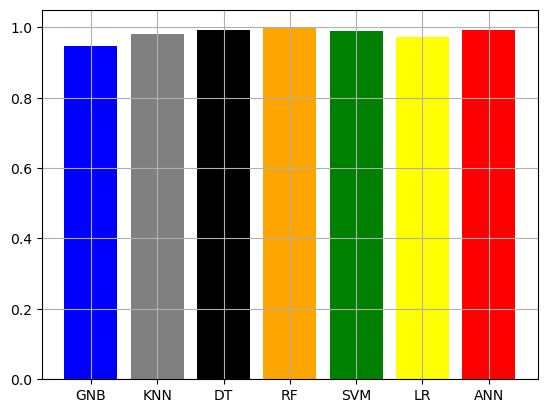

In [55]:
import matplotlib.pyplot as plt

acc_train = [acc_train_nb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
titles = ['GNB', "KNN", "DT" , "RF", "SVM", "LR", "ANN"]
colores = ["blue", "gray" , "black", "orange", "green", "yellow", "red"]
plt.bar(titles, acc_train, color = colores)
plt.grid()
plt.show()

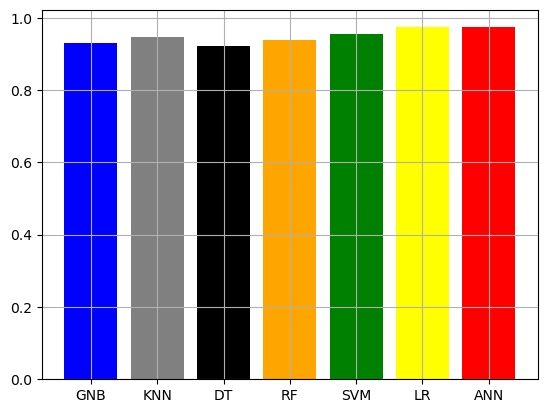

In [56]:
acc_test = [acc_test_nb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
titles = ['GNB', "KNN", "DT" , "RF", "SVM", "LR", "ANN"]
colores = ["blue", "gray" , "black", "orange", "green", "yellow", "red"]
plt.bar(titles, acc_test, color = colores)
plt.grid()
plt.show()